In [1]:
import pandas as pd
df = pd.read_csv('tweets.csv', encoding='ISO-8859-1')

In [2]:
df.columns = ['target', 'id', 'date', 'query', 'user', 'text']
df.head()

,target,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


/var/folders/l4/2s_9144s7rl3qk93f5y1lg940000gn/T/ipykernel_30703/2994830826.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


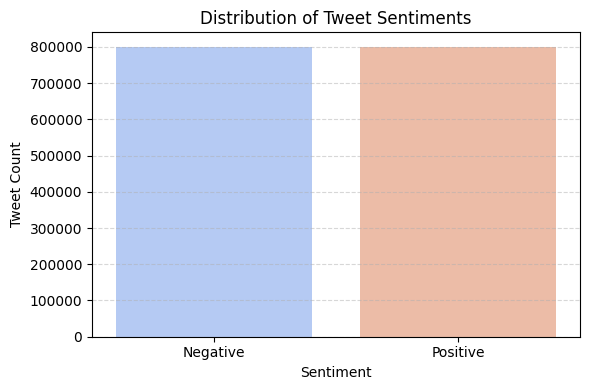


### 📊 Basic Sentiment Distribution

**Description:**
Description:
This bar chart shows a simple distribution of positive and negative tweets based on the original "target" column from the dataset (where 0 = negative, 4 = positive).
The results appear evenly split, with approximately 50% of the tweets labeled as positive and 50% as negative.
However, this binary classification was too simplistic and didn’t provide the level of insight I was looking for, which led me to perform a more nuanced sentiment analysis in the next graph.




In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# מיפוי הערכים לטקסט עבור גרף קריא
df['sentiment'] = df['target'].map({0: 'Negative', 4: 'Positive'})

# גרף
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')

plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

Markdown("""
### 📊 Basic Sentiment Distribution

**Description:**
Description:
This bar chart shows a simple distribution of positive and negative tweets based on the original "target" column from the dataset (where 0 = negative, 4 = positive).
The results appear evenly split, with approximately 50% of the tweets labeled as positive and 50% as negative.
However, this binary classification was too simplistic and didn’t provide the level of insight I was looking for, which led me to perform a more nuanced sentiment analysis in the next graph.


""")

In [4]:
from textblob import TextBlob

In [5]:
# הוספת עמודת פולאריות
df['polarity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [6]:
df[['text', 'polarity']].head(10)

,text,polarity
0,is upset that he can't update his Facebook by ...,0.000000
1,@Kenichan I dived many times for the ball. Man...,0.500000
2,my whole body feels itchy and like its on fire,0.200000
3,"@nationwideclass no, it's not behaving at all....",-0.625000
4,@Kwesidei not the whole crew,0.200000
5,Need a hug,0.000000
6,@LOLTrish hey long time no see! Yes.. Rains a...,0.270833
7,@Tatiana_K nope they didn't have it,0.000000
8,@twittera que me muera ?,0.000000
9,spring break in plain city... it's snowing,-0.214286


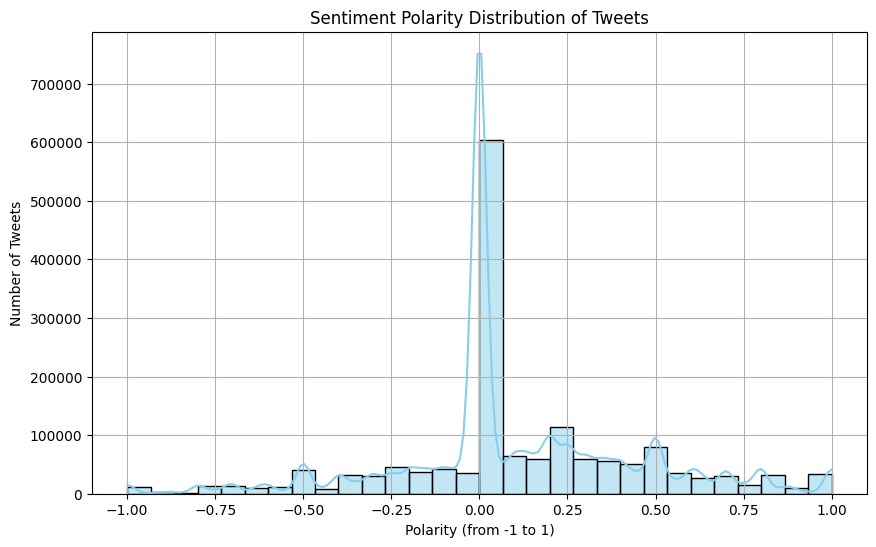


### 📈 Sentiment Polarity with TextBlob

**Description:**
This histogram represents a more detailed sentiment polarity analysis using the TextBlob library, which evaluates the actual text of each tweet.
The polarity score ranges from `-1` (very negative) to `+1` (very positive).
This method allows us to capture the **intensity** of sentiment instead of simply classifying tweets as positive or negative.
As shown in the graph, the distribution is more granular and provides deeper insight into public opinion and emotional tone.


In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['polarity'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Polarity Distribution of Tweets')
plt.xlabel('Polarity (from -1 to 1)')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

Markdown("""
### 📈 Sentiment Polarity with TextBlob

**Description:**
This histogram represents a more detailed sentiment polarity analysis using the TextBlob library, which evaluates the actual text of each tweet.
The polarity score ranges from `-1` (very negative) to `+1` (very positive).
This method allows us to capture the **intensity** of sentiment instead of simply classifying tweets as positive or negative.
As shown in the graph, the distribution is more granular and provides deeper insight into public opinion and emotional tone.
""")

In [8]:
# המרה לפורמט datetime של פנדס
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/var/folders/l4/2s_9144s7rl3qk93f5y1lg940000gn/T/ipykernel_30703/3244439989.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [9]:
# יצירת עמודות חדשות לזמנים
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour

/var/folders/l4/2s_9144s7rl3qk93f5y1lg940000gn/T/ipykernel_30703/135524836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='Blues')


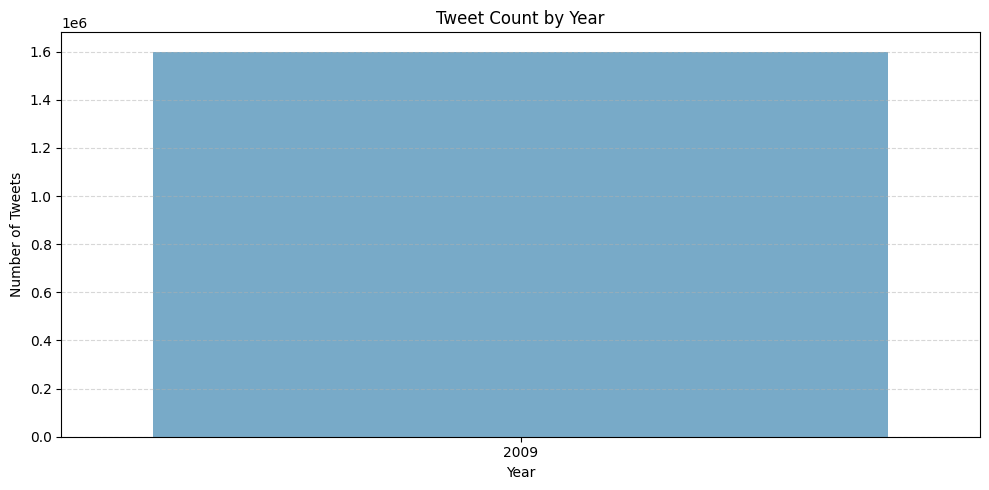


**Tweet Frequency by Year**

This chart shows how many tweets were posted each year in the dataset.
Analyzing tweet volume over time can reveal trends in user activity and platform usage.
It helps us understand whether Twitter usage increased or declined during specific periods.


In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year', palette='Blues')
plt.title('Tweet Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

display(Markdown("""
**Tweet Frequency by Year**

This chart shows how many tweets were posted each year in the dataset.
Analyzing tweet volume over time can reveal trends in user activity and platform usage.
It helps us understand whether Twitter usage increased or declined during specific periods.
"""))


/var/folders/l4/2s_9144s7rl3qk93f5y1lg940000gn/T/ipykernel_30703/4150863106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='Purples')


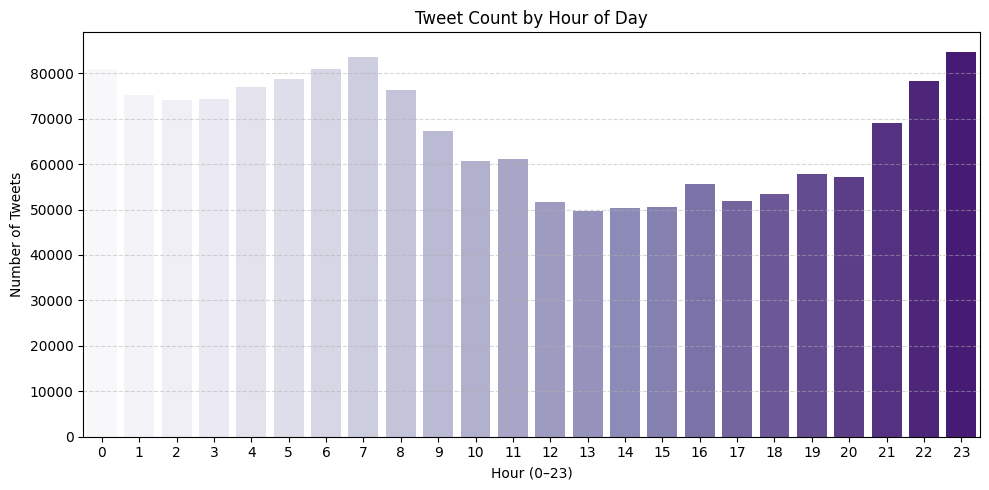


**Tweet Frequency by Hour of Day**

This visualization shows the distribution of tweets across different hours of the day (0–23).
It highlights peak activity times when users are most active on Twitter.
Such time-based patterns can provide insights into user behavior and engagement cycles.


In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', palette='Purples')
plt.title('Tweet Count by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Number of Tweets')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

display(Markdown("""
**Tweet Frequency by Hour of Day**

This visualization shows the distribution of tweets across different hours of the day (0–23).
It highlights peak activity times when users are most active on Twitter.
Such time-based patterns can provide insights into user behavior and engagement cycles.
"""))


/var/folders/l4/2s_9144s7rl3qk93f5y1lg940000gn/T/ipykernel_30703/478015213.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="coolwarm")


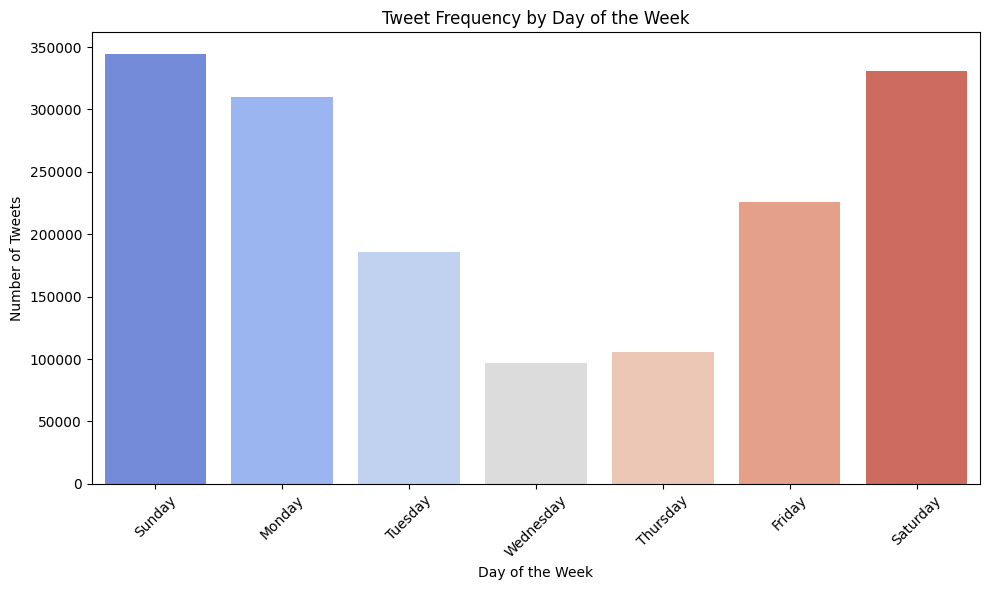


**Tweet Frequency by Day of the Week**

This graph displays the number of tweets posted on each day of the week.
It helps us identify which weekdays see the highest or lowest Twitter activity.
These trends can be useful for planning campaigns or studying user engagement habits.


In [12]:
# המרת עמודת התאריך לפורמט datetime (אם לא הומר קודם)
df['date'] = pd.to_datetime(df['date'])

# הוספת עמודת יום בשבוע
df['weekday'] = df['date'].dt.day_name()

# ספירת ציוצים לפי יום
weekday_counts = df['weekday'].value_counts().reindex([
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'
])

# גרף
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="coolwarm")
plt.title("Tweet Frequency by Day of the Week")
plt.ylabel("Number of Tweets")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(Markdown("""
**Tweet Frequency by Day of the Week**

This graph displays the number of tweets posted on each day of the week.
It helps us identify which weekdays see the highest or lowest Twitter activity.
These trends can be useful for planning campaigns or studying user engagement habits.
"""))


/var/folders/l4/2s_9144s7rl3qk93f5y1lg940000gn/T/ipykernel_30703/3326255466.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette="viridis")


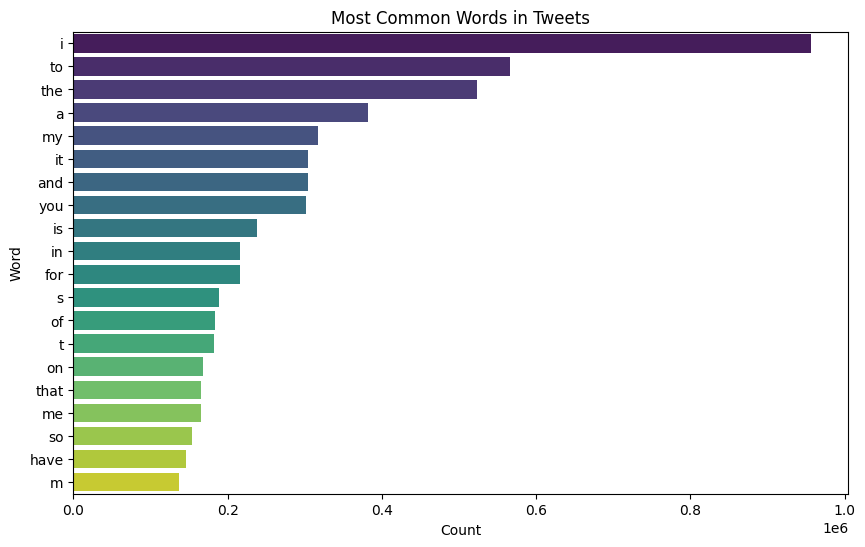

In [13]:
from collections import Counter
import re

# איחוד כל הציוצים
all_text = ' '.join(df['text'].astype(str))

# פיצול לפי מילה
words = re.findall(r'\b\w+\b', all_text.lower())

# ספירת המילים הכי נפוצות
common_words = Counter(words).most_common(20)

# גרף
words_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=words_df, x='count', y='word', palette="viridis")
plt.title("Most Common Words in Tweets")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


/var/folders/l4/2s_9144s7rl3qk93f5y1lg940000gn/T/ipykernel_30703/3269656252.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hashtags_df, x='count', y='hashtag', palette="mako")


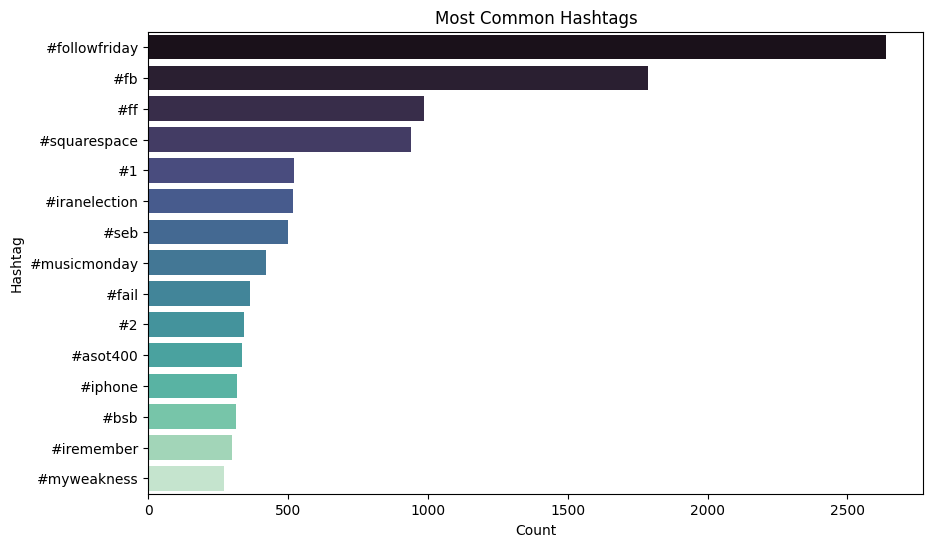

In [14]:
# שליפת האשטגים מהציוצים
hashtags = re.findall(r"#\w+", all_text.lower())

# ספירה
common_hashtags = Counter(hashtags).most_common(15)

# הצגה
hashtags_df = pd.DataFrame(common_hashtags, columns=['hashtag', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=hashtags_df, x='count', y='hashtag', palette="mako")
plt.title("Most Common Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()

In [15]:
def clean_tweet(tweet):
    tweet = tweet.lower()  # Convert to lowercase
    tweet = re.sub(r"http\S+", "", tweet)  # Remove links
    tweet = re.sub(r"@\w+", "", tweet)  # Remove @mentions
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)  # Remove special characters
    return tweet

# ניקוי ציוצים
df['cleaned_text'] = df['text'].apply(clean_tweet)

df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
2,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...
4,@Kwesidei not the whole crew,not the whole crew


In [16]:
display(Markdown("""
**Explanation:**

In this step, we clean the tweets.
We converted all the text to lowercase to handle words uniformly (e.g., "Hello" and "hello" will be treated as the same).
We removed links and @mentions to avoid irrelevant data from disrupting our analysis.
We also removed any special characters, focusing only on letters, which ensures a more accurate processing of the text.
"""))


**Explanation:**

In this step, we clean the tweets.
We converted all the text to lowercase to handle words uniformly (e.g., "Hello" and "hello" will be treated as the same).
We removed links and @mentions to avoid irrelevant data from disrupting our analysis.
We also removed any special characters, focusing only on letters, which ensures a more accurate processing of the text.


In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# הדפסת כמה מילים נפוצות שמופיעות ב-stopwords
print(list(ENGLISH_STOP_WORDS)[:10])


['with', 'after', 'into', 'however', 'yourselves', 'when', 'do', 'meanwhile', 'we', 'former']


In [18]:
import spacy
print(spacy.__file__)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/spacy/__init__.py


In [19]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
print("Model loaded successfully!")


Model loaded successfully!


In [20]:
nlp = spacy.load("en_core_web_sm")

# רשימת stopwords ב-spacy
stopwords = nlp.Defaults.stop_words
print(list(stopwords)[:10])


['with', 'after', 'into', 'however', 'yourselves', 'when', 'do', 'meanwhile', 'we', 'former']


In [21]:
def clean_text_spacy(text):
    # הסרה של לינקים
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # הסרה של אזכורים
    text = re.sub(r'@\w+', '', text)
    # הסרת סימנים מיוחדים ומספרים
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # המרה לאותיות קטנות
    text = text.lower()
    # הסרת stopwords
    tokens = [word for word in text.split() if word not in stopwords and len(word) > 2]
    return " ".join(tokens)

# דוגמה על עמודת טקסטים של df
df['clean_text'] = df['text'].apply(clean_text_spacy)

display(Markdown("""
**Explanation:**

 Text cleaning using spaCy:
 This function removes URLs, mentions, special characters, and numbers.
 It also converts all text to lowercase and removes English stopwords using spaCy's built-in list.
 The result is a cleaner version of the tweet, stored in a new column called 'clean_text'.
"""))


**Explanation:**

 Text cleaning using spaCy:
 This function removes URLs, mentions, special characters, and numbers.
 It also converts all text to lowercase and removes English stopwords using spaCy's built-in list.
 The result is a cleaner version of the tweet, stored in a new column called 'clean_text'.


In [22]:
from wordcloud import WordCloud

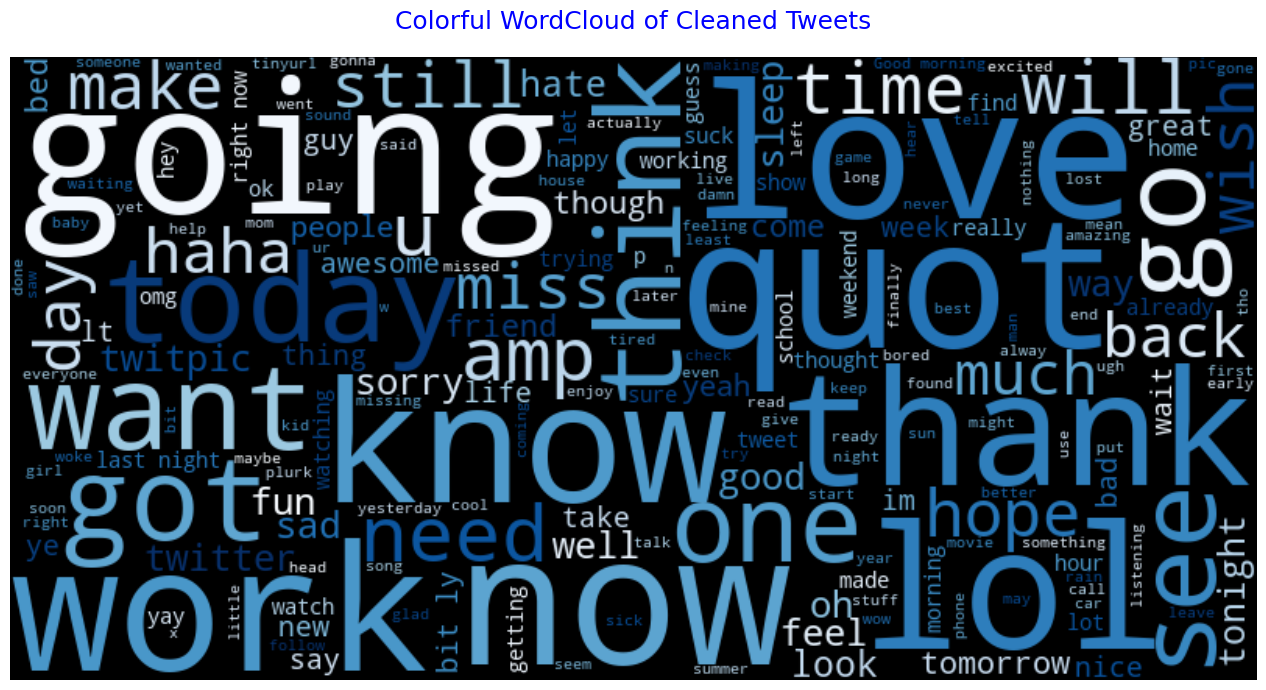

In [23]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Blues',
    max_words=200,
    max_font_size=120,
    random_state=42
).generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Colorful WordCloud of Cleaned Tweets', fontsize=18, color='blue', pad=20)
plt.tight_layout()

plt.show()


In [24]:
from PIL import Image

image = Image.open('twitter_logo.png')

In [25]:
import numpy as np
twitter_mask = np.array(Image.open('twitter_logo.png'))

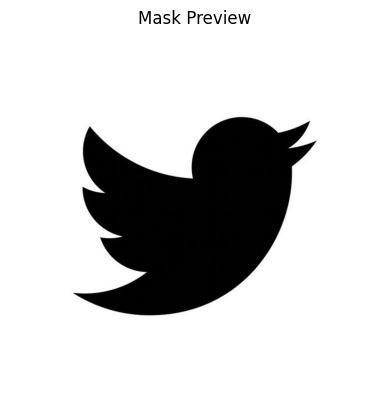

In [26]:
plt.imshow(twitter_mask, cmap='gray')
plt.axis('off')
plt.title('Mask Preview')
plt.show()


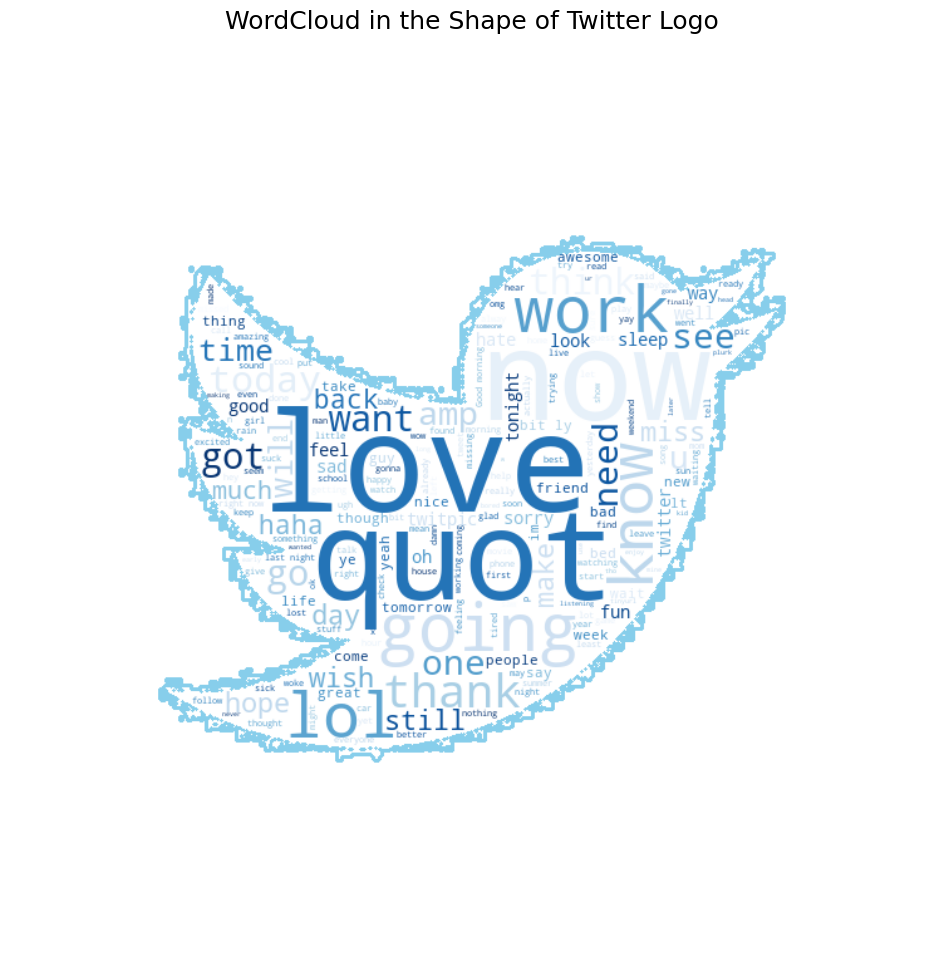

In [27]:
# צור את ענן המילים עם המסכה
wordcloud = WordCloud(
    background_color='white',
    mask=twitter_mask,
    contour_color='skyblue',
    contour_width=2,
    colormap='Blues',
    max_words=200,
    max_font_size=110,
    random_state=42
).generate(all_text)

# הצגה
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud in the Shape of Twitter Logo', fontsize=18)
plt.show()

# This WordCloud is shaped like the Twitter logo using a custom mask.
# It visually connects the word frequency data to the Twitter platform,
# enhancing engagement and thematic relevance in the data exploration.


In [28]:
# מיפוי הערכים הטקסטואליים לערכים מספריים
sentiment_map = {
    'Negative': 0,
    'Neutral': 2,
    'Positive': 4
}

df['sentiment'] = df['sentiment'].map(sentiment_map)


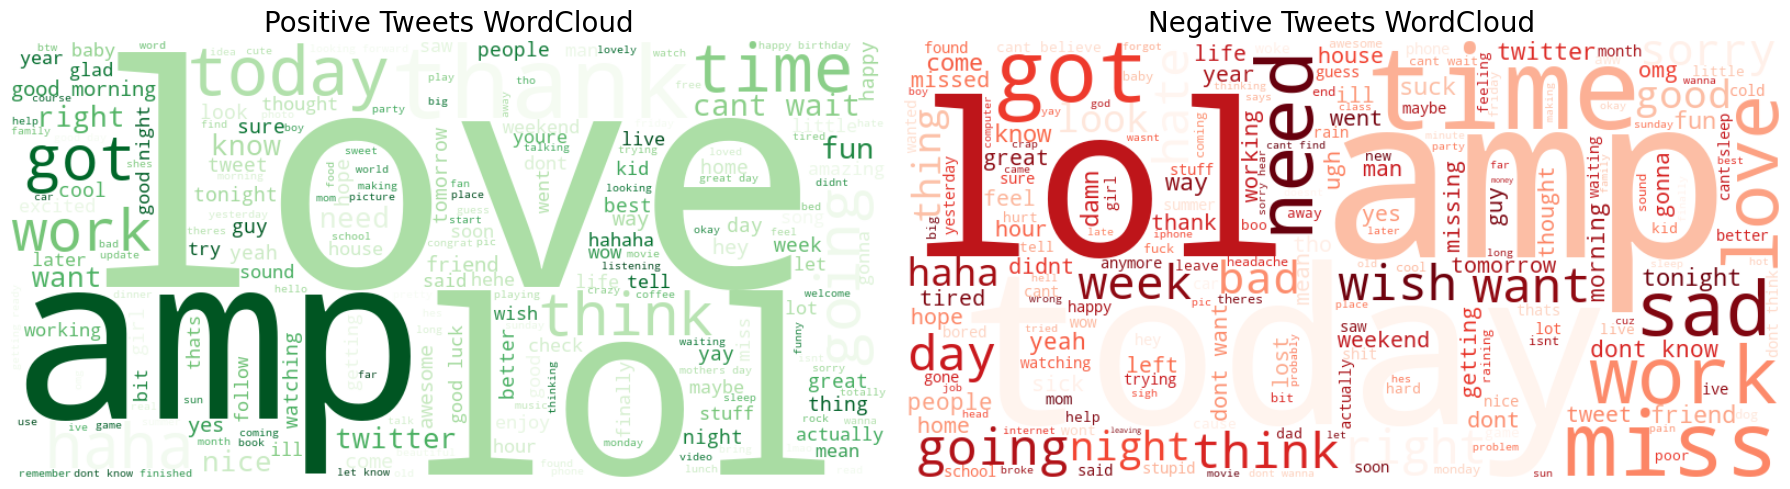

In [29]:
# חלוקה של הדאטה לפי רגשות
positive_tweets = df[df['sentiment'] >= 3]['clean_text']
negative_tweets = df[df['sentiment'] <= 1]['clean_text']

positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)

# יצירת ענן מילים חיובי
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# יצירת ענן מילים שלילי
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# הצגה של שניהם
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Positive Tweets WordCloud", fontsize=20)

ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Negative Tweets WordCloud", fontsize=20)

plt.tight_layout()
plt.show()



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


display(Markdown("""
**Explanation:**

 We built a text classification model to predict the sentiment of a tweet using a classic ML pipeline.
 First, we used TfidfVectorizer to transform the cleaned tweets into numerical features.
 Then, we trained a Naive Bayes classifier on the training data and evaluated it on a test set.
 The accuracy and classification report provide insight into the model's performance.

"""))

X = df['clean_text']  # טקסטים מנוקים
y = df['sentiment']   # תגיות רגש (0/2/4)

#  פיצול ל-Train ו-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  המרת טקסטים לווקטורים
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# אימון מודל Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

#  תחזיות והערכה
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

display(Markdown("""

**Model Evaluation Results:**

The model achieved an accuracy of approximately 75.2%, meaning that it correctly predicted the sentiment
of tweets about 3 out of 4 times. This is a strong baseline for a simple model based on Tfidf and Naive Bayes.

Looking at the classification report:
- Label '0' refers to negative sentiment tweets.
- Label '4' refers to positive sentiment tweets.

Precision (~0.75) indicates that 75% of tweets predicted as positive/negative were correct.
Recall (~0.75) shows that 75% of actual positive/negative tweets were identified correctly.
F1-score balances both, also around 0.75, which suggests good model performance on both classes.

These balanced scores across precision, recall, and F1-score indicate that the model is not biased toward one class,
and performs consistently in identifying both positive and negative sentiments.


"""))




**Explanation:**

 We built a text classification model to predict the sentiment of a tweet using a classic ML pipeline.
 First, we used TfidfVectorizer to transform the cleaned tweets into numerical features.
 Then, we trained a Naive Bayes classifier on the training data and evaluated it on a test set.
 The accuracy and classification report provide insight into the model's performance.



Accuracy: 0.7520125

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75    159494
           4       0.76      0.74      0.75    160506

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000





**Model Evaluation Results:**

The model achieved an accuracy of approximately 75.2%, meaning that it correctly predicted the sentiment
of tweets about 3 out of 4 times. This is a strong baseline for a simple model based on Tfidf and Naive Bayes.

Looking at the classification report:
- Label '0' refers to negative sentiment tweets.
- Label '4' refers to positive sentiment tweets.

Precision (~0.75) indicates that 75% of tweets predicted as positive/negative were correct.
Recall (~0.75) shows that 75% of actual positive/negative tweets were identified correctly.
F1-score balances both, also around 0.75, which suggests good model performance on both classes.

These balanced scores across precision, recall, and F1-score indicate that the model is not biased toward one class,
and performs consistently in identifying both positive and negative sentiments.




In [31]:
def predict_sentiment(text):
    # ניקוי בסיסי
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+|@\w+|[^a-zA-Z\s]", "", text)

    # המרה לווקטור
    text_vector = vectorizer.transform([text])

    # חיזוי
    prediction = model.predict(text_vector)[0]

    # פירוש התוצאה
    sentiment = "Positive 😊" if prediction == 4 else "Negative 😞"
    return sentiment

# הדגמה:
sample_texts = [
    "I love this new phone, it's amazing!",
    "This is the worst day of my life...",
    "Not bad, but could be better.",
    "Absolutely fantastic service!"
]

for text in sample_texts:
    print(f"Text: {text}\nPredicted Sentiment: {predict_sentiment(text)}\n")

display(Markdown("""
**Explanation:**

This function takes any new input text from a user, applies the same cleaning steps
as we did during training, and uses the trained model to predict its sentiment.

It returns either "Positive 😊" or "Negative 😞" depending on the prediction.
The example shows how this model can be used to analyze tweets or comments in real time.

"""))


Text: I love this new phone, it's amazing!
Predicted Sentiment: Positive 😊

Text: This is the worst day of my life...
Predicted Sentiment: Negative 😞

Text: Not bad, but could be better.
Predicted Sentiment: Negative 😞

Text: Absolutely fantastic service!
Predicted Sentiment: Positive 😊




**Explanation:**

This function takes any new input text from a user, applies the same cleaning steps
as we did during training, and uses the trained model to predict its sentiment.

It returns either "Positive 😊" or "Negative 😞" depending on the prediction.
The example shows how this model can be used to analyze tweets or comments in real time.



In [32]:
import gradio as gr

def analyze_sentiment(text):
    return predict_sentiment(text)

gr.Interface(fn=analyze_sentiment,
             inputs=gr.Textbox(lines=3, placeholder="Enter a tweet here..."),
             outputs="text",
             title="Twitter Sentiment Analyzer",
             description="Enter a tweet to get a prediction of its sentiment (Positive or Negative).").launch()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
